## Data Science & Business Analytics Internship: Sparks Foundation
### Author: Ayushi
### Task 1: Prediction using Supervised ML
- Predict the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/ day?



In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading data of students
s_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") 
print("Data imported successfully!")

#reading the first 10 values of the dataset
s_data.head(10)

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#check if there is any null value in the data set
s_data.isnull == True

False

 Since, there is no null value in the dataset so now we can visualise the data.

### Visualising the dataset

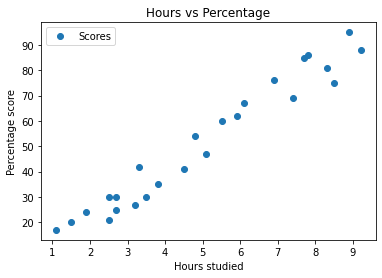

In [4]:
#plotting the distribution of scores
s_data.plot(x="Hours", y="Scores", style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [5]:
#we can use .corr to determine the correlation between the two variables
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above plot, we can see a correlation between the number of hours studied and percentage of score.

### Preparing the data

In [6]:
#using iloc function to divide the data into "features"(input) and "labels"(output)
X = s_data.iloc[:,:-1].values
y = s_data.iloc[:, 1].values

In [7]:
#splitting the dataset into training data and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the algorithm

In [8]:
#Training the data
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  

#fitting the data into the model
model.fit(X_train, y_train) 

print("Training completed.")

Training completed.


### Visualising the Model

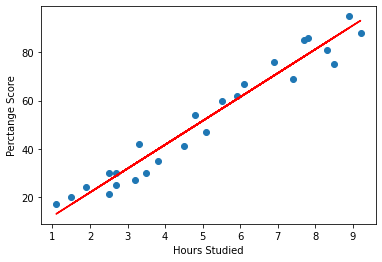

In [9]:
#plotting the regression line using y=mx+c
r_line = model.coef_*X + model.intercept_
plt.scatter(X, y)
plt.plot(X, r_line,color = 'red');
plt.xlabel('Hours Studied')
plt.ylabel('Perctange Score')
plt.show()

You can see there is a positive linear relation between the two variables.

### Making Predictions

In [10]:
#making predictions 
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [12]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
#comparing predicted vs actual marks
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Solving the problem

In [14]:
#testing with our own data
hours = 9.25
ans = model.predict([[hours]])
print("Predicted Score if a student studies for 9.25 hours = {}".format(round(ans[0],4)))

Predicted Score if a student studies for 9.25 hours = 93.6917


### Evaluating the Model

In [15]:
## evaluating the trained model by calculating mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
